In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv("C:/Users/Mythili/Downloads/SPY_close_price_5Y.csv")

In [3]:
df

,Date,Close
0,2020-11-02,330.20
1,2020-11-03,336.03
2,2020-11-04,343.54
3,2020-11-05,350.24
4,2020-11-06,350.16
...,...,...
1251,2025-10-27,685.24
1252,2025-10-28,687.06
1253,2025-10-29,687.39
1254,2025-10-30,679.83


In [4]:
# Calculate Moving Average (window=50 for example)
df["MA50"] = df['Close'].rolling(window=50).mean()

In [5]:
# Calculate Moving Average (window=200 for example)
df["MA200"] = df['Close'].rolling(window=200).mean()

In [6]:
df

,Date,Close,MA50,MA200
0,2020-11-02,330.20,NaN,NaN
1,2020-11-03,336.03,NaN,NaN
2,2020-11-04,343.54,NaN,NaN
3,2020-11-05,350.24,NaN,NaN
4,2020-11-06,350.16,NaN,NaN
...,...,...,...,...
1251,2025-10-27,685.24,658.5806,607.44455
1252,2025-10-28,687.06,659.4558,607.97740
1253,2025-10-29,687.39,660.4074,608.50740
1254,2025-10-30,679.83,661.2418,608.99560


In [7]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df

,Date,Close,MA50,MA200
0,2020-11-02,330.20,NaN,NaN
1,2020-11-03,336.03,NaN,NaN
2,2020-11-04,343.54,NaN,NaN
3,2020-11-05,350.24,NaN,NaN
4,2020-11-06,350.16,NaN,NaN
...,...,...,...,...
1251,2025-10-27,685.24,658.5806,607.44455
1252,2025-10-28,687.06,659.4558,607.97740
1253,2025-10-29,687.39,660.4074,608.50740
1254,2025-10-30,679.83,661.2418,608.99560


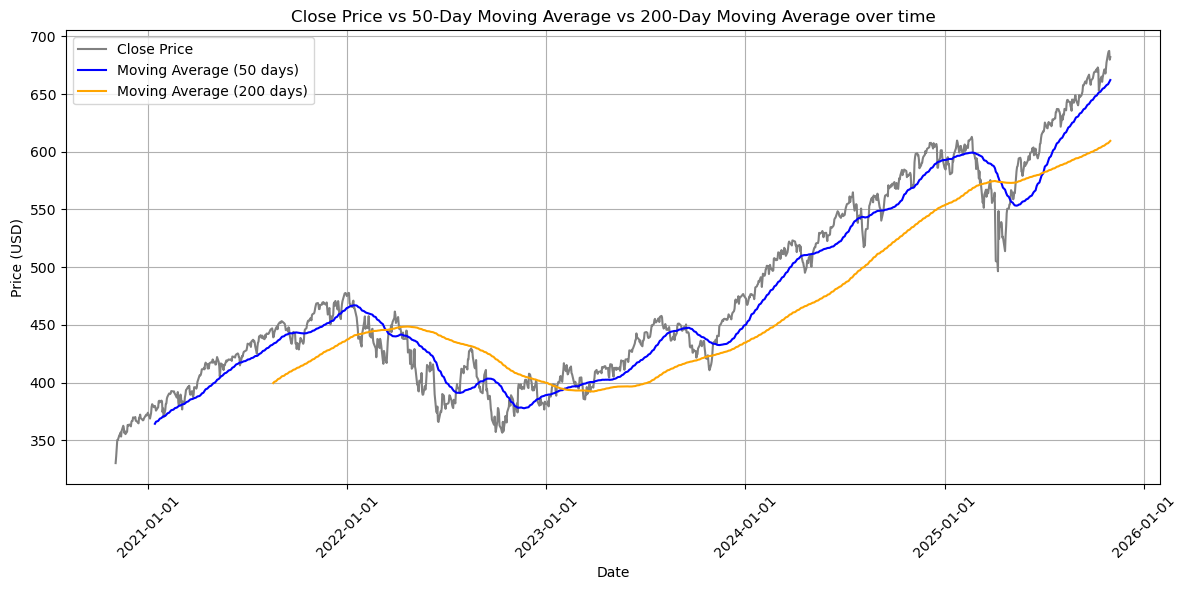

In [9]:
# Create the plot
plt.figure(figsize=(12, 6))

# Plot Close Price
plt.plot(df['Date'], df['Close'], label='Close Price', color="grey")

# Plot 50-Day-Moving Average
plt.plot(df['Date'], df['MA50'], label='Moving Average (50 days)', color="blue")

# Plot 200-Day-Moving Average
plt.plot(df['Date'], df['MA200'], label='Moving Average (200 days)', color="orange")

# Format X-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Add labels, title, legend, and grid
plt.title('Close Price vs 50-Day Moving Average vs 200-Day Moving Average over time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
df['Golden_Cross'] = (df['MA50'] > df['MA200']) & (df['MA50'].shift(1) <= df['MA200'].shift(1))
df['Golden_Cross'].unique()

array([False,  True])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1256 non-null   datetime64[ns]
 1   Close         1256 non-null   float64       
 2   MA50          1207 non-null   float64       
 3   MA200         1057 non-null   float64       
 4   Golden_Cross  1256 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(3)
memory usage: 40.6 KB


In [12]:
df.loc[df['Golden_Cross'] == True, 'Date']
print(f"Golden_Cross Dates are: {df.loc[df['Golden_Cross'] == True, 'Date'].iloc[:2]}")

Golden_Cross Dates are: 566    2023-02-02
1169   2025-07-01
Name: Date, dtype: datetime64[ns]


In [13]:
# df.query("Golden_Cross == True")["Date"]